In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [12]:
from matplotlib import font_manager, rc
# matplotlib 에 맑은고딕 폰트 적용
## Window
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#plt.rc('font', family=font_name)
#[(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'Malgun' in f.name]
## macOS
plt.rc('font', family='AppleGothic')

wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃을 사용<br>
x 축에 세 개의 데이트 데이터를 흐린 별 모양으로 표시

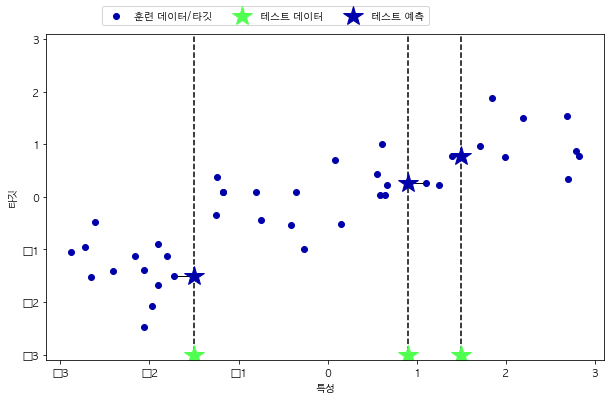

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

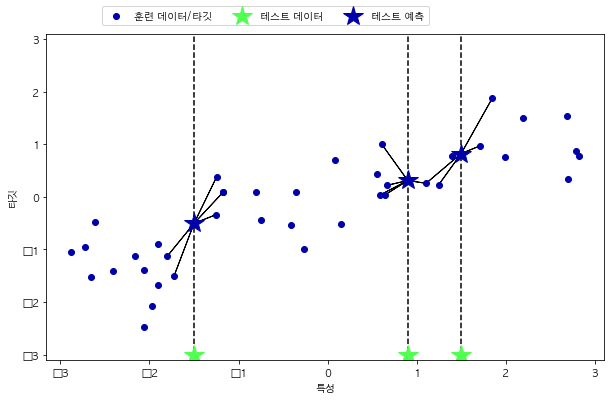

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=5)
## 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측이됨

## scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어 있음

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듬
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [16]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [17]:
# score 메서드는 회귀일 때 R^2값을 반환합니다.
# 결정 계수라고도 하는 R^2값은 회귀 모델에서 예측 적합도를 0과 1사이의 값으로 계산한 것
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### 2.3.3 선형 모델
선형 모델은 입력 특성에 대한 **선형 함수**를 만들어 예측을 수행함<br>
y = w[0] * x[0] + w[1] * x[1] ... w[p] * x[p] + b;<br>
x[0] ~ x[p] 까지는 하나의 데이터 포인트에 대한 특성을 나타내며, w와 b는 모데링 학습할 파라미터가 됨<br>
그리고 y는 모델이 만들어낸 예측값

w[0]: 0.393906  b: -0.031804


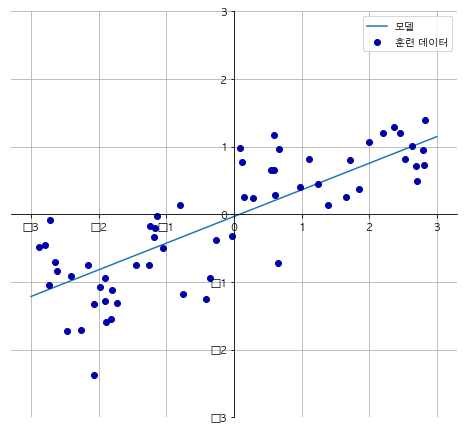

In [18]:
# wave 데이터 셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시키기!
mglearn.plots.plot_linear_regression_wave()
# w[0] 은 대략 4이므로, 기울기가 4인 것을 알 수 있음

> 타깃 y가 특성들의 선형 조합이라는 것은 매우 과한 가정처럼 보이지만 1차원 데이터만 놓고 봐서 생긴 편견 일 수 있음<br>특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있음. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 선형 함수로 모델링 할 수 있음

### 선형모델은 다양하며, 이 모델들은 훈련 데이터로부터 모델 파라미터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가남

### 선형 회귀(최소 제곱법)
선형 회귀는 `예측`과 훈련 세트에 있는 `타깃 y`사이의 **평균제곱오차(mean squared error)** 를 최소화하는 파라미터 w와 b를 찾습니다.<br>
(평균 제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나누는 것)<br>
=> 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없음

In [19]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

**기울기 파라미터(w)** 는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_속성에 저장되어 있음<br>
**파라미터(b)** 는 편향(offset) 또는 절편(intercept)라고 하며 intercept_속성에 저장되어 있음

In [20]:
print("lr.coef_(w) : {}".format(lr.coef_))
print("lr.intercept_(b): {}".format(lr.intercept_))

lr.coef_(w) : [0.39390555]
lr.intercept_(b): -0.031804343026759746


In [21]:
## 성능 확인
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


R^2 값이 그리 좋지않고 훈련세트나 테스트세트의 점수가 매우 비슷한 것으로 보아 이는 과소 적합임을 알수 있다

1차원 모델에서는 모델이 단순하므로 과대적합을 걱정할 경우는 거의 없으며 고차원 데이터 세트의 경우는 선형 모델의 성능이 매우 높아 과대적합이 되는 경우가 많음

#### 보스턴 주택가격 데이터셋을 활용(샘플이 506개, 특성 105개)

In [22]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [23]:
## 계수, 절편 보기
print("lr.coef_(w) : {}".format(lr.coef_))
print("lr.intercept_(b): {}".format(lr.intercept_))
## 성능 확인
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_(w) : [-4.02752236e+02 -5.00710011e+01 -1.33316908e+02 -1.20021023e+01
 -1.27106873e+01  2.83052585e+01  5.44920273e+01 -5.17339345e+01
  2.52602789e+01  3.64990704e+01 -1.01038605e+01 -1.96288897e+01
 -2.13677312e+01  1.46473758e+01  2.89505391e+03  1.51026852e+03
  1.17995400e+02 -2.65658068e+01  3.12488451e+01 -3.14463610e+01
  4.52535825e+01  1.28349557e+03 -2.24600306e+03  2.22198614e+02
 -4.66264354e-01  4.07661992e+01 -1.34357879e+01 -1.90960479e+01
 -2.77605103e+00 -8.09710327e+01  9.73141885e+00  5.13324280e+00
 -7.87928926e-01 -7.60269229e+00  3.36717627e+01 -1.15051345e+01
  6.62672250e+01 -1.75632324e+01  4.29826712e+01  1.27662043e+00
  6.09633677e-01  5.71868313e+01  1.40823103e+01  5.53404218e+01
 -3.03481907e+01  1.88121756e+01 -1.37772336e+01  6.09790464e+01
 -1.25792000e+01 -1.20021023e+01 -1.76980605e+01 -3.40279371e+01
  7.15036708e+00 -8.41017086e+00  1.69857259e+01 -1.29412471e+01
 -1.18060747e+01  5.71334581e+01 -1.75814680e+01  1.69557926e+00
  2.7217738

훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 신호이므로 복잡도를 제어할 수 있는 모델들 사용해야 함<br>
기본 선형 회귀 방식 대신 널리 쓰이는 모델은 **릿지 회귀**

### 릿지 회귀(Ridge)
릿지도 선형 모델이므로 **최소적합법**에 사용된 것과 같은 예측함수를 사용 함<br>
하지만 릿지회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음<br>
<br>
가중치의 절댓값을 가능한 한 작게 만드는 것(w의 모든 원소가 0에 가깝게 되길 원함) => 출력에 주는 영향을 최소한으로 만듬(기울이 작게)<br>
이런 제약을 규제(regularization)이라고 함.<br>
규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이며, 릿지 회귀에서 사용하는 규제 방식을 L2규제라고 함

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


선형 회귀는 이 데이터셋에 과대적합 되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어지는 것을 볼 수 있음<br>
모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반회된 모델이 됨<br>
<br>
사용자는 **alpha 매개변수**로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있음(기본값은 1)<br>
alpha값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에 도움을 줄 수 있음<br>

In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


0.1이 더 좋은 성능을 낸 것을 볼 수 있음. 테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄 이면서 실행할 수 있을 것임<br>

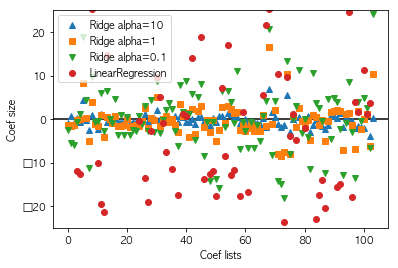

In [27]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coef lists")
plt.ylabel("Coef size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절대값 크기가 작을 것으로 예상 할 수 있음<br>
<br>
규제의 효과를 이해하는 또 다른 방법으로은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것 임<br>

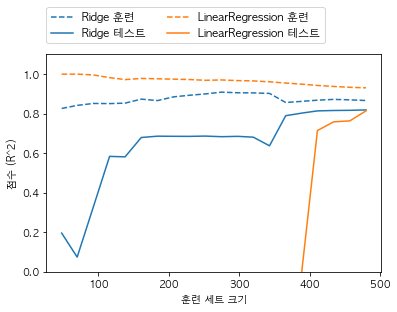

In [28]:
mglearn.plots.plot_ridge_n_samples()
## default alpha = 1

릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮습니다.<br>
테스트 데이터에서는 릿지의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 그렇습니다.<br>
여기서 배울 점은 데이터를 충분히 주면 규제 항은 덜 중요해져서 **릿지 회귀와 선형 회귀의 성능이 같아질 것**이라는 점
**선형 회귀의 훈련 데이터 성능이 감소한다는 점** 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

### 라쏘(Lasso)
선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있음.<br>
Lasso 또한 Ridge와 같이 계수를 0에 가깝게 만드려고 노력함<br>
하지만 방식이 조금 다르며 L1규제를 사용하여 라쏘를 사용할 때 어떤 계수는 정말 0이 될 때도 있음(모델에서 완전히 제어되는 특성이 생긴다는뜻)<br>

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


과소적합이며 105개의 특성 중 4개만 사용한 것을 볼 수 있음<br>
과소적합을 줄이기 위해서 alpha 값을 줄여서 사용해보겠음(이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야함)

In [30]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련 세트와 테스트 세트에서의 성능이 좋아짐<br>
Ridge보다 조금 나은데 사용된 특성 105개 중 33개뿐이어서, 아마도 모델을 분석하기가 조금 더 쉬움<br>
하지만 alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해짐

In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 94


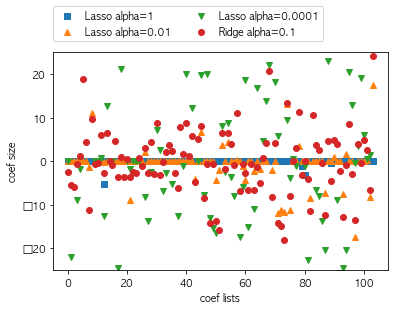

In [32]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef lists")
plt.ylabel("coef size");

보통은 릿지 회귀를 선호<br>
하지만 특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋은 선택일 수 있음<br>
또한 분석하기 쉬운 모델을 원한다면 Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 줄 것임
=> scikit-learn은 Lasso와 Ridge의 페널티를 결합한 ElasticNet도 제공. 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야 함

### 분류용 선형 모델
선형 모델은 분류에서도 널리 사용함<br>
먼저 이진 분류(binary classification)을 설명<br>
이 경우 예측을 위한 방정식은 아래와 같음<br>
y = w[0] * x[0] + w[1] * x[1] ... w[p] * x[p] + b > 0 <br>
선형 회귀 방정식과 비슷하지만 예측한 값을 임계치 0과 비교하다는 것이 다름<br>
함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 0보다 크면 +1이라고 예측<br>
회귀용 선형 모델에서는 출력 y가 특성의 선형함수 였음(직선, 평면, 초평면)<br>
분류형 선형 모델에서는 결정 경계가 입력의 선형 함수가 됨. 다른 말로하면 (이진)선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기임<br>
**선형모델을 학습시키는 알고리즘을 구분하는 기준**
1. 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
2. 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
<br>
<br>

**가장 널리 알려진 두 개의 선형 분류 알고리즘**
1. linear_model.LogisticRegression에 구현된 **로지스틱 회귀(logistic regression)**
2. svm.LinearSVC에 구현된 **서포트 벡터 머신(support vector machine)**

forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 그림으로 그림

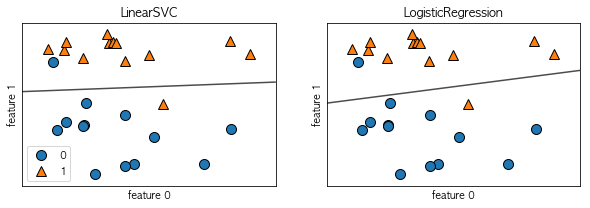

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend();

두 모델은 기본적으로 L2 규제를 사용함<br>
LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C임<br>
C가 높으면 과대적합(overfitting) 적으면 과소적합(underfitting)<br>
=> C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확하게 분류하려고 노력

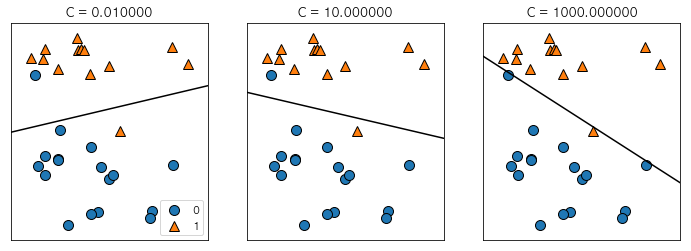

In [34]:
mglearn.plots.plot_linear_svc_regularization()

오른쪽 그림의 모델은 모든 데이터 포인트르르 정확하게 분류하려고 애썼지만 클래스의 전체적인 배치를 잘 파악하지 못한 케이스 즉 과대적합<br>
회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것처럼 보이지만, 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


기본값은 C=1이며 훌륭한 성능을 보이고 있으<br>
하지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과속적합으로 판단됨<br>
모델의 제약을 더 풀어보겠음

In [37]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


C=100을 사용하니 훈련 세트의 정확도가 높아졌고 테스트 세트의 정확도 또한 증가<br>
이는 복잡도가 높은 모델일수록 성능이 좋음을 말해줌

In [38]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


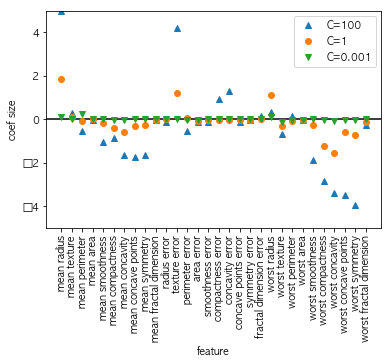

In [39]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend();

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


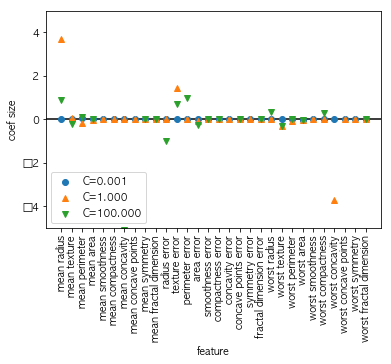

In [40]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature")
plt.ylabel("coef size")

plt.ylim(-5, 5)
plt.legend(loc=3);


### 다중 클래스 분류용 선형 모델
많은 선형 분류 모델은 태생적으로 이진 분류만을 지원함(다중 클래스 지원 x)<br>
이진 분류 알고리즘은 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다 방법<br>
일대다 방식은 각 클래스를 다른 모든 클래스와 구분 하도록 이진 부류 모델을 학습시키고, 결국 클래수의 수 만큼 이진 부류 모델을 만들어 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스 값을 선택 하도록 하는 방식을 취한다.<br>
클래스마다 계수 벡터와 절편이 존재 한다.<br>
세개의 클래스를 가진 예를 들어보자<br>
이 데이터세트는 2차원이며 각 클래스는 정규분포(가우시안 분포)를 따른다 가정하자

In [52]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
print(X)
print(y)

[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]
 [-3.05358035  9.12520872]
 [-6.65216726 -5.57296684]
 [-6.35768563 -6.58312492]
 [-3.6155326   7.8180795 ]
 [-1.77073104  9.18565441]
 [-7.95051969 -6.39763718]
 [-6.60293639 -6.05292634]
 [-2.58120774 10.01781903]
 [-7.76348463 -6.72638449]
 [-6.40638957 -6.95293851]
 [-2.97261532  8.54855637]
 [-6.9567289  -6.53895762]
 [-7.32614214 -6.0237108 ]
 [-2.14780202 10.55232269]
 [-2.54502366 10.57892978]
 [-2.96983639 10.07140835]
 [ 3.22450809  1.55252436]
 [-6.25395984 -7.73726715]
 [-7.85430886 -6.09302499]
 [-8.1165779  -8.20056621]
 [-7.55965191 -6.6478559 ]
 [ 4.93599911  2.23422496]
 [ 4.44751787  2.27471703]
 [-5.72103161 -7.70079191]
 [-0.92998481  9.78172086]
 [-3.10983631  8.72259238]
 [-2.44166942  7.58953794]
 

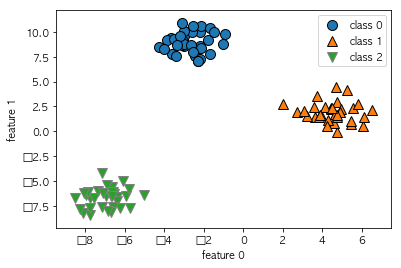

In [48]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"]);

In [53]:
#LinearSVC 모델 적용
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [56]:
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.1749212   0.2314053 ]
 [ 0.47621407 -0.0693763 ]
 [-0.18914139 -0.20400537]]
[-1.07745256  0.13140711 -0.08604995]


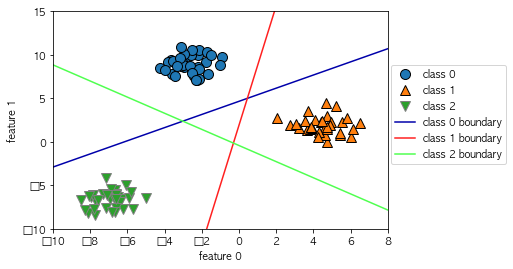

In [57]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3));

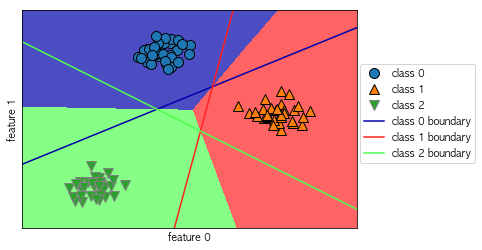

In [58]:

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3));

### 장단점과 매개변수
선형 모델의 주요 매개변수는 회귀모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C이다.<br>
alpha 값이 클수록, C값이 작을수록 모델이 단순해짐(규제가 많아짐)<br>
